# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2 
my_eth = 5.3 

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [10]:
import json
# Fetch current BTC price
# YOUR CODE HERE!
btc_data = requests.get(btc_url)
btc_json = btc_data.json()
print(json.dumps(btc_json, indent = 4))
btc_value = btc_json['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
# YOUR CODE HERE!]
eth_data = requests.get(eth_url)
eth_json = eth_data.json()
print(json.dumps(eth_json, indent = 4))
eth_value = eth_json['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18588143,
            "total_supply": 18588143,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 29732.0,
                    "volume_24h": 33846922979,
                    "market_cap": 552574821489,
                    "percentage_change_1h": 0.524080927476217,
                    "percentage_change_24h": 1.86769718768794,
                    "percentage_change_7d": 20.5147277211238,
                    "percent_change_1h": 0.524080927476217,
                    "percent_change_24h": 1.86769718768794,
                    "percent_change_7d": 20.5147277211238
                }
            },
            "last_updated": 1609570959
        }
    },
    "metadata": {
        "timestamp": 1609570959,
        "num_cryptoc

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [17]:
# Current amount of shares
# YOUR CODE HERE!
portfolio_shares = [200, 50]

In [16]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_api_key)
type(alpaca_secret_key)
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [18]:
# Format current date as ISO format
# YOUR CODE HERE!
current_date = pd.Timestamp('2020-12-31', tz = 'America/New_York').isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_tickers = alpaca.get_barset(
    tickers, 
    timeframe, 
    start = current_date, 
    end = current_date
).df 

# Preview DataFrame
# YOUR CODE HERE!
df_tickers.head()

AGG                                     SPY  \
                             open    high     low  close   volume    open   
time                                                                        
2020-12-31 00:00:00-05:00  118.18  118.24  118.12  118.2  4325026  371.78   

                                                              
                             high      low   close    volume  
time                                                          
2020-12-31 00:00:00-05:00  374.66  371.232  373.85  52720911

In [23]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = df_tickers.iloc[0]['AGG']['close']
spy_close_price = df_tickers.iloc[0]['SPY']['close']
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.2
Current SPY closing price: $373.85


In [24]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy = portfolio_shares[1]
my_agg = portfolio_shares[0]

my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price 
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18692.50
The current value of your 200 AGG shares is $23640.00


### Savings Health Analysis

In [29]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000 
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(
    {'amount': [my_btc_value +  my_eth_value, my_spy_value + my_agg_value]
    },
    index = ['cryto', 'shares']
)
# Display savings DataFrame
display(df_savings)

,amount
cryto,39584.977
shares,42332.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

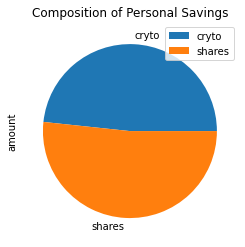

In [30]:
# Plot savings pie chart
# YOUR CODE HERE!

df_savings.plot.pie(y = 'amount', title = 'Composition of Personal Savings')

In [37]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = df_savings.iloc[0].sum()

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund: 
    print(f"""
    Your total savings is ${total_savings} which is greater than your emergency fund ${emergency_fund} by ${round(abs(total_savings - emergency_fund), 2)}."""
    )
elif total_savings <= emergency_fund: 
    print(f"""
    Your total savings is ${total_savings}, which is less than your emergency fund ${emergency_fund} by ${round(abs(total_savings -emergency_fund), 2)}."""
    )


    


    Your total savings is $39584.977 which is greater than your emergency fund $36000 by $3584.98.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [40]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [42]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(
    tickers, 
    timeframe, 
    start = start_date, 
    end = end_date
).df
# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [43]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_simulation_30YR = MCSimulation(
    portfolio_data = df_stock_data, 
    weights = [0.4, 0.6],
    num_simulation = 500, 
    num_trading_days = 252*30
)

In [45]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_simulation_30YR.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [46]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_simulation_30YR.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993331,1.000553,1.003535,0.993645,1.003237,0.990228,0.996878,0.997345,1.000716,1.006768,...,1.015741,0.989320,1.001187,0.994235,1.004474,1.003291,0.990164,1.005148,1.014535,0.989236
2,1.001728,0.999551,1.013014,0.983528,0.997810,0.993007,0.983908,0.993727,1.010577,1.008988,...,1.014417,0.986516,1.012031,0.991045,0.995123,0.999973,0.995697,1.005343,1.014200,0.994892
3,1.002891,1.001184,1.016404,0.979986,0.999483,0.996390,0.975995,0.987107,1.004007,1.007464,...,1.010438,0.987265,1.019425,0.986675,1.001573,0.994619,1.009344,1.007628,1.023848,0.997518
4,0.995987,1.001023,1.017999,0.983352,1.002604,0.999516,0.991236,0.984717,1.013883,1.001069,...,1.004548,0.994580,1.023333,0.991502,1.002662,1.001035,1.005096,1.014465,1.034839,1.003523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.580904,4.708979,7.217117,9.230312,7.313885,21.053636,24.832484,7.341307,16.924581,14.316824,...,11.171186,3.984322,4.271139,13.948187,21.329876,2.752762,8.331147,13.923194,8.355261,28.640973
7557,9.472417,4.708254,7.206472,9.186632,7.356820,21.074985,24.835192,7.392846,16.749190,14.177759,...,11.174585,3.944935,4.262307,13.948861,21.434965,2.739988,8.348395,13.871805,8.287936,28.722957
7558,9.473066,4.738157,7.294053,9.210709,7.304677,21.038416,25.048630,7.410648,16.760597,14.080943,...,11.235828,3.952630,4.274805,13.915426,21.632021,2.745366,8.382028,13.659019,8.389419,28.762323
7559,9.518536,4.717354,7.416570,9.176630,7.279380,21.402938,25.313464,7.421658,16.756571,13.930108,...,11.348248,3.953485,4.289187,14.003136,21.727537,2.747905,8.252910,13.680606,8.378593,29.116494


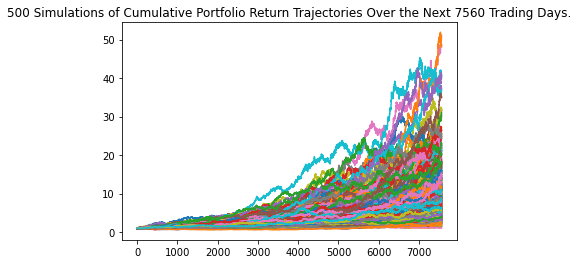

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!

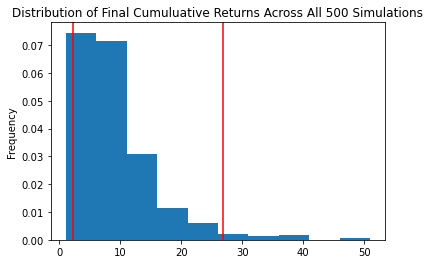

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              9.200762
std               6.659594
min               1.045214
25%               4.941116
50%               7.381182
75%              11.327780
max              50.993592
95% CI Lower      2.296975
95% CI Upper     26.810558
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $45939.5 and $536211.17


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $68909.24 and $804316.75


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002773,0.995921,0.995673,0.994602,1.005021,0.998532,1.001126,1.005124,0.994500,0.999171,...,1.002697,1.007377,0.999067,0.997822,0.998338,1.003092,0.997770,1.005395,0.999348,1.005300
2,1.004519,0.994920,0.995504,0.997885,0.999418,1.002665,0.998714,1.009062,0.992389,0.997706,...,1.004034,1.008911,0.999323,1.000654,0.999466,1.004265,0.994733,1.003748,0.996511,1.012382
3,1.003420,0.989709,0.994363,1.001670,1.004349,1.002377,1.001845,1.011481,0.991912,0.994580,...,1.002351,1.006664,1.002174,0.998934,1.003854,1.010202,0.996131,1.002018,0.999665,1.014892
4,0.999165,0.990064,0.986792,1.003455,1.007765,1.007514,0.997581,1.015886,0.986637,0.998216,...,1.002834,0.999865,1.000353,1.003079,1.003303,1.012221,0.997754,1.000544,1.001517,1.013704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.266580,1.196174,1.233861,1.609848,1.173492,1.242440,1.329611,1.157732,1.354542,0.980124,...,1.193369,1.265576,1.176646,1.146853,1.214548,1.145207,1.193672,1.131104,1.003777,1.234636
1257,1.259830,1.201814,1.231141,1.621046,1.172662,1.239173,1.331916,1.157722,1.354061,0.980815,...,1.194320,1.269009,1.182694,1.146907,1.213701,1.143455,1.200143,1.131160,1.006530,1.234546
1258,1.265916,1.196261,1.226184,1.622075,1.174943,1.240829,1.335755,1.157986,1.350916,0.981539,...,1.203336,1.271746,1.178878,1.148263,1.213656,1.146064,1.197322,1.134041,1.005902,1.236184
1259,1.268268,1.202293,1.223321,1.623647,1.170809,1.248084,1.336792,1.162289,1.341674,0.977214,...,1.200892,1.273981,1.175435,1.145972,1.210717,1.146312,1.194024,1.132655,1.007751,1.242664


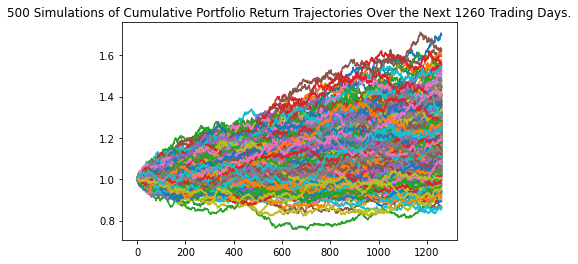

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

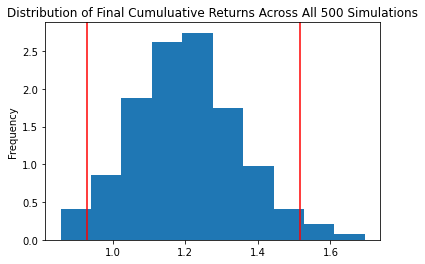

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.202273
std               0.145565
min               0.856322
25%               1.100622
50%               1.197687
75%               1.292270
max               1.695081
95% CI Lower      0.928556
95% CI Upper      1.517173
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $55713.36 and $91030.38


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997817,0.998428,1.000816,1.000202,1.002120,0.998788,1.004226,1.004250,1.001431,1.000740,...,0.995519,1.001253,1.000492,0.994026,1.006129,1.002356,1.005233,0.999769,1.002106,1.003746
2,0.994703,0.996223,1.001987,0.998816,1.002372,0.996708,1.009074,1.006986,1.006219,0.995591,...,0.991815,1.001091,1.003774,0.989341,1.007530,1.009809,1.007273,0.999666,1.006340,0.998303
3,0.994115,0.993375,0.992622,1.001069,0.999700,1.000123,1.011610,1.009254,1.012194,0.998619,...,0.992699,1.003085,1.005997,0.991536,1.004239,1.010765,1.009501,0.999652,1.011737,0.998762
4,0.999040,0.997821,0.992272,0.999767,1.000459,1.006178,1.008906,1.009897,1.014282,0.995619,...,0.997683,1.007825,1.007858,0.991188,1.009171,1.009303,1.008223,1.003270,1.014350,1.001691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.164254,1.246948,1.441080,1.685210,1.702114,1.474774,1.535126,1.288182,1.138653,1.500977,...,1.367442,1.357662,1.661583,1.348599,1.649220,1.782632,1.450872,1.701338,1.199957,1.171159
2517,2.169555,1.246315,1.436260,1.685058,1.697652,1.479128,1.536203,1.288485,1.144082,1.498097,...,1.366833,1.360457,1.672969,1.351751,1.646287,1.781356,1.459438,1.695322,1.197466,1.171882
2518,2.169089,1.243387,1.426446,1.685480,1.714264,1.479079,1.537777,1.289258,1.140795,1.496271,...,1.368088,1.357853,1.662915,1.354957,1.637911,1.781046,1.451367,1.695901,1.201111,1.172847
2519,2.170695,1.238881,1.419187,1.670521,1.720418,1.478161,1.544292,1.296500,1.137510,1.499085,...,1.370125,1.359697,1.664317,1.352170,1.633762,1.778638,1.443413,1.699061,1.191529,1.166331


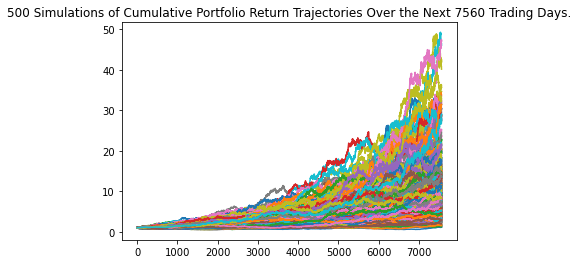

In [47]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_simulation_30YR.plot_simulation()

line_plot.get_figure().savefig('MC_Simulation_30YR_Plot.png', bbox_inches = 'tight')


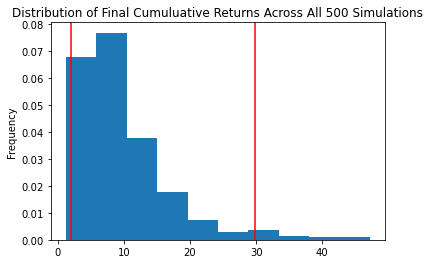

In [48]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_simulation_30YR.plot_distribution()

dist_plot.get_figure().savefig('MC_Simulation_30YR_DistPlot.png', bbox_inches = 'tight')

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
table = MC_simulation_30YR.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(table)

count           500.000000
mean              9.783864
std               6.953323
min               1.180991
25%               5.077779
50%               8.153585
75%              12.376161
max              47.260466
95% CI Lower      2.031755
95% CI Upper     29.895443
Name: 7560, dtype: float64


In [50]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(table[8]*initial_investment, 2)
ci_upper_ten = round(table[9]*initial_investment, 2)
# Print results
#Used 30 Years instead of 10 Years as Monte Carlo simulation was of a 60/40 'SPY'/'AGG' portfolio for 30 Years. 
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $121905.28 and $1793726.59
